<a href="https://colab.research.google.com/github/shizoda/education/blob/main/machine_learning/image_proc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理

### 画像の表現

画像はコンピュータ上では，画像を格子状に区切った **画素** の配列として表現されます。一般的な2次元画像の場合、画素はピクセル (pixel) ともよばれます。

この課題では2次元のカラー画像を扱います。色は通常、赤(R)、緑(G)、青(B) の3つの値で表され、それぞれが 0以上 255 以下の整数になります。つまり、1つの画素を表すのに3つの値が必要です。

#### 画像の読み込みとnumpy配列への変換の解説

PythonのPIL（Pillow）ライブラリを使って画像を読み込み、numpy配列に変換します。

サンプル画像をダウンロードして開いてみましょう。

In [8]:
# ファイルをダウンロードするライブラリ
import urllib.request

# サンプル画像（富士山の写真，パブリックドメイン）
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/320px-MtFuji_FujiCity.jpg'

# 画像をダウンロードして保存するパス
image_path = '/content/sample_image.jpg'

# URLから画像をダウンロードして保存
urllib.request.urlretrieve(image_url, image_path)

('/content/sample_image.jpg', <http.client.HTTPMessage at 0x7b843808add0>)

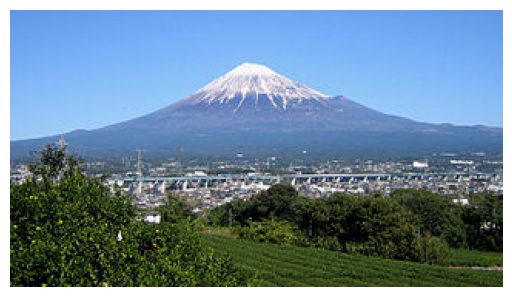

In [42]:
from PIL import Image              # PNG, JPG などのファイル形式を扱うライブラリ
import matplotlib.pyplot as plt    # 画像やグラフなどの可視化を行うライブラリ

# ダウンロードした画像を読み込む
img = Image.open(image_path)

# numpy配列に変換
img_array = np.array(img)

# 画像の表示
plt.figure(figsize=(img_array.shape[1] / 50, img_array.shape[0] / 50))
plt.imshow(img_array)
plt.axis('off')
plt.show()

### 画像の次元とチャネル

numpy配列となった画像の形状を確認します。

カラー画像の場合、通常は (高さ, 幅, チャネル数) の形状を持ちます。
この場合、RGBカラー画像ではチャネル数は3です。

In [12]:
print("Image shape:", img_array.shape)  # 画像の形状を出力（例：(H, W, C)）
print("Image dtype:", img_array.dtype)  # データ型を出力（例：uint8など）

Image shape: (180, 320, 3)
Image dtype: uint8


### グレースケールへの変換

説明を単純にするため、グレースケールに変換してみます。

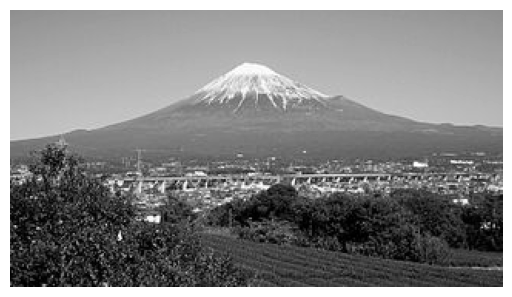

In [44]:
gray_img = img.convert('L')
gray_array = np.array(gray_img)

# 画像の表示
plt.figure(figsize=(gray_array.shape[1] / 50, gray_array.shape[0] / 50))
plt.imshow(gray_array, cmap='gray')
plt.axis('off')
plt.show()

### 画像からの特徴抽出

ここからは、画像内の重要なパターンや情報を抽出し、その情報を元に画像の理解や処理を行っていきます。

特徴抽出とは、画像処理において重要な概念であり、画像から意味のある情報や特定のパターンを取り出すプロセスです。通常、画像はピクセル（画素）の集合として表現されますが、これだけでは画像に含まれる有用な情報を直接抽出するのは難しいです。特徴抽出は、画像内の局所的な領域やパターンを捉え、そのパターンが画像全体でどのように分布しているかを示す数値化された表現を生成します。

具体的には、特徴抽出はフィルタやカーネルを用いた畳み込み演算などで行われます。畳み込みフィルタは、画像上でスライドさせながら局所的な領域とフィルタの積和を計算し、その結果を新しい画像（特徴マップ）として出力します。例えば、エッジ検出のためのフィルタでは、画像の境界や変化の大きな領域を強調し、その情報を抽出します。

特徴抽出の目的は、画像の理解や処理を行うための基盤を提供することです。これにより、画像内の重要な情報を抽出し、後段の処理や解析に活用することが可能となります。

#### 畳み込み

畳み込み（Convolution）は、信号処理や画像処理の基本的な演算であり、最もよく使われる手法の一つです。畳み込みは、2つの関数を合成する操作であり、一般的には畳み込み積分として知られています。

画像処理においては、畳み込み演算は画像上でフィルタやカーネルをスライドさせることで行われます。この過程で、畳み込まれる画像領域とフィルタの対応する部分の要素積和が計算され、その結果が出力されます。畳み込みは、画像のフィルタリング、エッジ検出、特徴抽出などに広く応用されます。

<a title="Michael Plotke, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif"><img width="256" alt="2D Convolution Animation" src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif?20130203224852"></a>

#### カーネル（微分によるエッジ強調，ぼかし等）

カーネルは、畳み込み演算で使用される重要な要素です。カーネルは一般的に小さな行列（フィルタ）であり、畳み込み操作の際に画像上でスライドさせられます。

畳み込みの目的に応じて異なるカーネルが使われます．エッジ検出やぼかし、シャープネスの強調などを行うものが代表的です。微分によるエッジ強調を行う場合、水平方向や垂直方向のエッジを抽出します。また、ぼかしを行う場合には、周囲のピクセルの値を平滑化します。これらのカーネルは、畳み込みを通じて画像の特定の特徴を強調します。

In [29]:
def convolution(image, kernel, stride=1):

    """
    2次元の畳み込み演算を行う関数

    Parameters:
    image : numpy array
        入力画像（2次元配列）
    kernel : numpy array
        畳み込みカーネル（2次元配列）
    stride : int, optional
        ストライドの値（デフォルトは1）

    Returns:
    numpy array
        畳み込み演算後の出力画像（2次元配列）
    """

    # 入力画像とカーネルのサイズを取得
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # 畳み込み演算後の出力画像のサイズを計算
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    # 出力画像の初期化
    output = np.zeros((output_height, output_width))

    # 畳み込み演算
    for h in range(output_height):
        for w in range(output_width):
            region = image[h * stride:h * stride + kernel_height,
                           w * stride:w * stride + kernel_width]
            output[h, w] = np.sum(region * kernel)

    return output

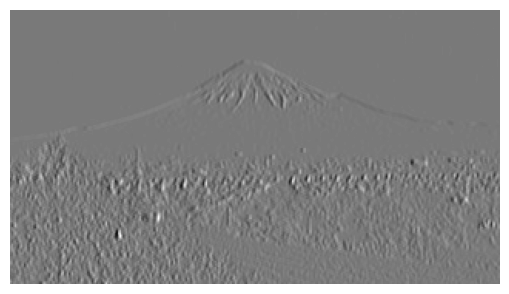

結果のサイズ (178, 318)


In [45]:
# 畳み込みカーネルの定義
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 畳み込み処理の実行
output_image = convolution(gray_array, kernel)

# 結果の表示
plt.figure(figsize=(output_image.shape[1] / 50, output_image.shape[0] / 50))
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

print("結果のサイズ", output_image.shape)

### 画像が小さくなる理由

畳み込み演算では、畳み込みカーネルを画像の上にスライドさせながら演算を行います。このとき、画像の端（辺縁部分）においては畳み込みカーネルが完全に適用されないことがあります。具体的には、畳み込みカーネルが画像の範囲を超えてしまうため、その部分においては畳み込み演算が行えません。

<a title="Vincent Dumoulin, Francesco Visin, MIT &lt;http://opensource.org/licenses/mit-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif"><img width="256" alt="Convolution arithmetic - Full padding no strides transposed" src="https://upload.wikimedia.org/wikipedia/commons/8/85/Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif?20190413174624"></a>

上の例では、元の画像が 180×320、畳み込みカーネルが 3×3 でした。畳み込み演算によって得られる出力画像のサイズは以下のように計算されます

- 出力画像の高さ: $180−3+1=178$
- 出力画像の幅:　 $320−3+1=318$

この場合、元の画像の辺縁部分では、畳み込みカーネルが完全に適用されないため、出力画像の寸法が元の画像よりも小さくなります。畳み込み演算を行う際には、画像の端のピクセルでは畳み込みカーネルが画像からはみ出すため、その部分の演算は行えません。

なお以下の図のように、辺縁での計算を工夫することでサイズを小さくしないこともあります。

<a title="Vincent Dumoulin, Francesco Visin, MIT &lt;http://opensource.org/licenses/mit-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_Same_padding_no_strides.gif"><img width="256" alt="Convolution arithmetic - Same padding no strides" src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Convolution_arithmetic_-_Same_padding_no_strides.gif?20190413174642"></a>

### ストライド

畳み込み演算ではストライド（stride）として、フィルタ（カーネル）を画像上でどれだけ移動させるかを設定します。通常、ストライドが1の場合、フィルタは1ピクセルずつ移動し、重なり合う部分で演算が行われます。一方、ストライドを大きくすると、フィルタが大きくジャンプし、出力される画像のサイズが小さくなります。


<a title="Vincent Dumoulin, Francesco Visin, MIT &lt;http://opensource.org/licenses/mit-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_No_padding_strides.gif"><img width="256" alt="Convolution arithmetic - No padding strides" src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Convolution_arithmetic_-_No_padding_strides.gif?20190413174627"></a>

<!-- <a title="Vincent Dumoulin, Francesco Visin, MIT &lt;http://opensource.org/licenses/mit-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_Padding_strides_odd.gif"><img width="256" alt="Convolution arithmetic - Padding strides odd" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Convolution_arithmetic_-_Padding_strides_odd.gif?20190413174630"></a> -->

入力画像のサイズを $ W \times H $、フィルタのサイズを $ F \times F $、ストライドを $ S $ とすると、畳み込み演算後の出力画像のサイズ $ W' \times H' $ は次のように計算されます：

$$
W' = \frac{W - F}{S} + 1 \\
H' = \frac{H - F}{S} + 1
$$

ここで、 $W′$ と $ H′$ は出力画像の幅と高さです。

ストライドを 1 より大きくすると、入力画像よりも小さな出力を得ることができます。

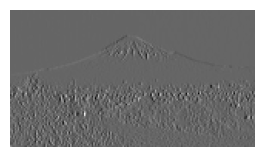

結果のサイズ (89, 159)


In [46]:
# 畳み込みカーネルの定義
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 畳み込み処理の実行（ストライド2）
output_image = convolution(gray_array, kernel, stride=2)

# 結果の表示
plt.figure(figsize=(output_image.shape[1] / 50, output_image.shape[0] / 50))
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

print("結果のサイズ", output_image.shape)

### 画像から特徴量へ

iris のデータセットの演習では，4 次元の **特徴量** からアヤメを分類しました。それは、それらの値がすでに花の分類に有用な状態で提供されていたからこそ可能でした。

しかし画像はそうなっていません。画像は通常、数万や数億といった膨大な画素で構成されています。ここで畳み込みを用いることで、エッジのような重要な特徴を画像から引き出せます。ストライドを調節すれば、そのような重要な特徴を含む、画像より小さな配列を得ることもできます。

<a title="Aphex34, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Typical_cnn.png"><img width="512" alt="Typical cnn" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/512px-Typical_cnn.png?20151217030420"></a>

深層学習の手法として有名な **畳み込みニューラルネットワーク** (Convolutional Neural Network; **CNN**) は、画像を入力として、畳み込みを用いて画像から特徴量を抽出してから、分類や回帰などの目的に利用します。今回の演習では、カーネルはみずから定義しましたが、CNN ではカーネル自体も学習されます。解こうとしている問題にあわせてカーネルの値を調節するのが、CNN の学習であるともいえます。

それでは，[CNN を用いた画像分類の演習に進みましょう。](https://github.com/shizoda/education/blob/main/machine_learning/cnn/cifar10_pytorch.ipynb)